# Tensorflow Implementation of Word2vec skipgram Tensor(NCE_loss)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.reset_default_graph()

In [3]:
# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]


In [4]:
word_sequence = " ".join(sentences).split()
print(word_sequence)

['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']


In [5]:
word_list = " ".join(sentences).split()
print(word_list)

['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']


In [6]:
word_list = list(set(word_list))
print(word_list)

['dog', 'movie', 'book', 'music', 'milk', 'eyes', 'apple', 'hate', 'fish', 'like', 'animal', 'i', 'cat']


In [8]:
word_dict = {w: i for i, w in enumerate(word_list)}
print(word_dict)

{'dog': 0, 'movie': 1, 'book': 2, 'music': 3, 'milk': 4, 'eyes': 5, 'apple': 6, 'hate': 7, 'fish': 8, 'like': 9, 'animal': 10, 'i': 11, 'cat': 12}


In [9]:
# Word2Vec Parameter
batch_size = 20
embedding_size = 2 # To show 2 dim embedding graph
num_sampled = 10 # for negative sampling, less than batch_size
voc_size = len(word_list)
print(voc_size)

13


In [10]:
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(data[i][0])  # target
        random_labels.append([data[i][1]])  # context word

    return random_inputs, random_labels

In [11]:
# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])


In [12]:
# Model
inputs = tf.placeholder(tf.int32, shape=[batch_size])
labels = tf.placeholder(tf.int32, shape=[batch_size, 1]) # To use tf.nn.nce_loss, [batch_size, 1]


In [13]:
print(inputs)

Tensor("Placeholder:0", shape=(20,), dtype=int32)


In [14]:
print(labels)

Tensor("Placeholder_1:0", shape=(20, 1), dtype=int32)


In [15]:
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

In [16]:
print(embeddings)

<tf.Variable 'Variable:0' shape=(13, 2) dtype=float32_ref>


In [17]:
print(selected_embed)

Tensor("embedding_lookup/Identity:0", shape=(20, 2), dtype=float32)


In [19]:
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))
print(nce_biases)
print("--------------------------")
print(nce_weights)

<tf.Variable 'Variable_4:0' shape=(13,) dtype=float32_ref>
--------------------------
<tf.Variable 'Variable_3:0' shape=(13, 2) dtype=float32_ref>


In [20]:
# Loss and optimizer
cost = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, num_sampled, voc_size))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
# Training
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(5000):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})

        if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    trained_embeddings = embeddings.eval()

Epoch: 1000 cost = 3.649884
Epoch: 2000 cost = 3.060176
Epoch: 3000 cost = 2.834609
Epoch: 4000 cost = 2.913104
Epoch: 5000 cost = 2.976567


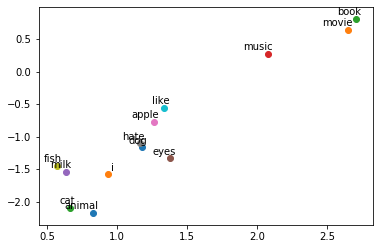

In [22]:
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

# Word2Vec skipgram model with softmax loss in Tensorflow

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [24]:
tf.reset_default_graph()


In [25]:
# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]


In [26]:
print(sentences)

['i like dog', 'i like cat', 'i like animal', 'dog cat animal', 'apple cat dog like', 'dog fish milk like', 'dog cat eyes like', 'i like apple', 'apple i hate', 'apple i movie book music like', 'cat dog hate', 'cat dog like']


In [27]:
word_sequence = " ".join(sentences).split()
print(word_sequence)

['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']


In [29]:
word_list = " ".join(sentences).split()
print(word_list)
print("---------------")
word_list = list(set(word_list))
print(word_list)
print("----------------")
word_dict = {w: i for i, w in enumerate(word_list)}
print(word_dict)


['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']
---------------
['dog', 'movie', 'book', 'music', 'milk', 'eyes', 'apple', 'hate', 'fish', 'like', 'animal', 'i', 'cat']
----------------
{'dog': 0, 'movie': 1, 'book': 2, 'music': 3, 'milk': 4, 'eyes': 5, 'apple': 6, 'hate': 7, 'fish': 8, 'like': 9, 'animal': 10, 'i': 11, 'cat': 12}


In [30]:
# Word2Vec Parameter
batch_size = 20
embedding_size = 2 # To show 2 dim embedding graph
voc_size = len(word_list)
print(voc_size)

13


In [31]:
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # target
        random_labels.append(np.eye(voc_size)[data[i][1]])  # context word

    return random_inputs, random_labels


In [32]:
# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])


In [33]:
# Model
inputs = tf.placeholder(tf.float32, shape=[None, voc_size])
labels = tf.placeholder(tf.float32, shape=[None, voc_size])

In [35]:
# W and WT is not Traspose relationship
W = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
WT = tf.Variable(tf.random_uniform([embedding_size, voc_size], -1.0, 1.0))


In [36]:
hidden_layer = tf.matmul(inputs, W) # [batch_size, embedding_size]
output_layer = tf.matmul(hidden_layer, WT) # [batch_size, voc_size]


In [37]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=labels))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)


In [38]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for epoch in range(5000):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss = sess.run([optimizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})

        if (epoch + 1)%1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

        trained_embeddings = W.eval()

Epoch: 1000 cost = 2.216197
Epoch: 2000 cost = 2.271632
Epoch: 3000 cost = 2.058421
Epoch: 4000 cost = 1.789876
Epoch: 5000 cost = 2.176954


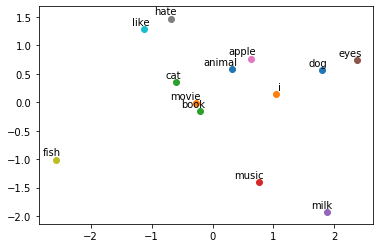

In [39]:
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

# Word2Vec Skipgram Implementation in Torch for softmax loss function


In [40]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt


In [41]:
dtype = torch.FloatTensor


In [42]:
# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

print(sentences)
print("------------")
word_sequence = " ".join(sentences).split()
print(word_sequence)
print("------------")
word_list = " ".join(sentences).split()
print(word_list)
print("------------")
word_list = list(set(word_list))
print(word_list)
print("------------")
word_dict = {w: i for i, w in enumerate(word_list)}
print(word_dict)

['i like dog', 'i like cat', 'i like animal', 'dog cat animal', 'apple cat dog like', 'dog fish milk like', 'dog cat eyes like', 'i like apple', 'apple i hate', 'apple i movie book music like', 'cat dog hate', 'cat dog like']
------------
['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']
------------
['i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'cat', 'animal', 'apple', 'cat', 'dog', 'like', 'dog', 'fish', 'milk', 'like', 'dog', 'cat', 'eyes', 'like', 'i', 'like', 'apple', 'apple', 'i', 'hate', 'apple', 'i', 'movie', 'book', 'music', 'like', 'cat', 'dog', 'hate', 'cat', 'dog', 'like']
------------
['dog', 'movie', 'book', 'music', 'milk', 'eyes', 'apple', 'hate', 'fish', 'like', 'animal', 'i', 'cat'

In [43]:
# Word2Vec Parameter
batch_size = 20  # To show 2 dim embedding graph
embedding_size = 2  # To show 2 dim embedding graph
voc_size = len(word_list)

In [44]:
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # target
        random_labels.append(data[i][1])  # context word

    return random_inputs, random_labels


In [45]:
# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])

In [46]:
# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()

        # W and WT is not Traspose relationship
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype) # voc_size > embedding_size Weight
        self.WT = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype) # embedding_size > voc_size Weight

    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = torch.matmul(X, self.W) # hidden_layer : [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.WT) # output_layer : [batch_size, voc_size]
        return output_layer


In [47]:
model = Word2Vec()


In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [50]:
#Training
for epoch in range(5000):

    input_batch, target_batch = random_batch(skip_grams, batch_size)

    input_batch = Variable(torch.Tensor(input_batch))
    target_batch = Variable(torch.LongTensor(target_batch))

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1)%1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 2.323265
Epoch: 2000 cost = 2.129730
Epoch: 3000 cost = 2.450592
Epoch: 4000 cost = 1.917434
Epoch: 5000 cost = 1.926217


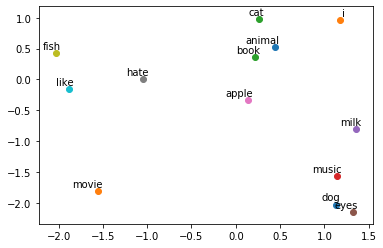

In [51]:
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()